In [7]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import cv2
import urllib.request
import time

In [2]:
def read_url_pic(x):
    """read the image from remote url
       and assign it to a variable"""
    image_url = x

    with urllib.request.urlopen(image_url) as url:
        s = url.read()

    arr = np.asarray(bytearray(s), dtype=np.uint8)
    image = cv2.imdecode(arr, -1)
    return image
    
def plot_url_pic(x):
    image_url = x

    with urllib.request.urlopen(image_url) as url:
        s = url.read()

    arr = np.asarray(bytearray(s), dtype=np.uint8)
    image = cv2.imdecode(arr, -1)

    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

def img_to_arr(x):
    img = cv2.imread(x)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img,(64,64))
    return img

# based on your requirements below cell can be manipulated

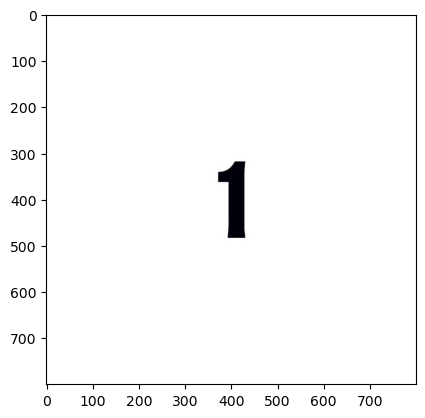

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [3]:
plot_url_pic("https://www.dhlabels.com/119-large_default/placas-y-numeros-number-1-100mm.jpg")
img = read_url_pic("https://www.dhlabels.com/119-large_default/placas-y-numeros-number-1-100mm.jpg")
img

In [4]:
df = pd.read_csv("./Dataset/english.csv")
print(df.head())
df['image'] = "./Dataset/" + df['image']
print(df.head())

                image label
0  Img/img001-001.png     0
1  Img/img001-002.png     0
2  Img/img001-003.png     0
3  Img/img001-004.png     0
4  Img/img001-005.png     0
                          image label
0  ./Dataset/Img/img001-001.png     0
1  ./Dataset/Img/img001-002.png     0
2  ./Dataset/Img/img001-003.png     0
3  ./Dataset/Img/img001-004.png     0
4  ./Dataset/Img/img001-005.png     0


(64, 64)


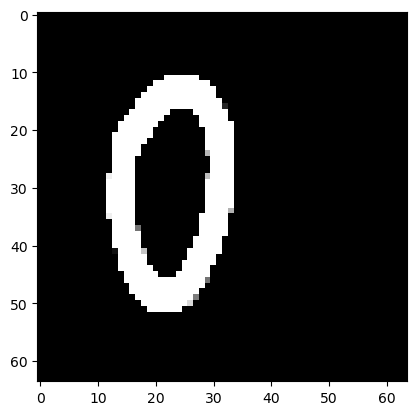

In [5]:
print(img_to_arr(df['image'][0]).shape)
plt.imshow(img_to_arr(df['image'][0]),cmap='Greys')

In [ ]:
# start_time = time.time()
# image_array = []
# for i in df['image']:
#     image = img_to_arr(i)  # Read the image using cv2.imread()
#     if image is not None:
#         image_array.append(image)
# end_time = time.time()
# print("without multiprocessing:", end_time-start_time)



start_time = time.time()
import multiprocessing

with multiprocessing.Pool(4) as p:
    images = p.map(img_to_arr, df['image'])
end_time = time.time()
print("with multiprocessing:", end_time-start_time)

In [ ]:
x = np.array(images).reshape(3410, 64, 64,1)
x.shape

In [ ]:
img = x[119].reshape((64,64))
plt.imshow(img,cmap='gray')
print(df['label'].iloc[119])

In [ ]:
y = df['label']   
le = LabelEncoder()
y_label = le.fit_transform(y)

In [ ]:
train_images,test_images,train_labels,test_labels = train_test_split(x,y_label,test_size=0.2,random_state=42)
train_images = train_images/255.0
test_images = test_images/255.0

In [ ]:
model = Sequential()
model.add(Conv2D(512,(5,5),activation='relu',input_shape=(64,64,1)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(256,(3,3),activation='relu',input_shape=(64,64,1)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(1024,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='sigmoid'))
model.add(Dense(62,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(train_images,train_labels,epochs=20,validation_data = (test_images,test_labels))

In [ ]:
model.summary()

In [ ]:
predicted_labels = le.inverse_transform(model.predict(test_images).argmax(axis=1))
actual_labels = le.inverse_transform(test_labels)

In [ ]:
print('predicted label is ;',predicted_labels[67])
print('Actual Label is :',actual_labels[67])

# if you want to test by yourself

In [ ]:
# number of image to be predicted
# change the value of I
i = 450



plt.imshow(test_images[i],cmap='gray')
print('printed label :',predicted_labels[i])
print('actual label :', actual_labels[i])

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


y_pred = model.predict(test_images)
y_pred_labels = np.argmax(y_pred, axis=1)

# Calculate evaluation metrics
accuracy = accuracy_score(test_labels, y_pred_labels)
precision = precision_score(test_labels, y_pred_labels, average='weighted')
recall = recall_score(test_labels, y_pred_labels, average='weighted')
f1 = f1_score(test_labels, y_pred_labels, average='weighted')
confusion_mat = confusion_matrix(test_labels, y_pred_labels)

# Print or use the evaluation metrics as needed
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(confusion_mat)